## 5. GLMの尤度比検定と検定の非対称性
### 5.1 統計学的な検定のわくぐみ
使用するデータを確定させたら、適切な統計モデルを設計し、それを使ってパラメータを最尤推定する。  
パラメータの少ないモデルと多いモデル(単純なモデル・複雑なモデル)を、統計学的検定では**帰無仮説**・**対立仮説**と呼ぶ。  
モデルの当てはまりの良さなどを**検定統計量**に指定し、  
帰無仮説が「真のモデル」と仮定して、そのときに検定統計量の理論的なばらつきを調べて、検定統計量がとりうる範囲を求める。  
この範囲が95%であるとき、5%の**有意水準**を設定したという。  
そして、対立仮説のモデルで得られた検定統計量が、この範囲からはみ出ていることを確認し、  
はみ出ていれば帰無仮説は棄却され、対立仮説が支持されたと結論される。  
この検定のわくぐみを**Neyman-Pearsonの検定**のわくぐみと呼ぶ。

### 5.2 尤度比検定：逸脱度の差
種子数データを使って説明する。  
ここで使用するモデルは、$\lambda_i=\exp{(\beta_1+\beta_2x_i)}$を平均値とするポアソン分布のGLMである。  
- $\log{\lambda}_i=\beta_1$　…　一定モデル(k=1)
- $\log{\lambda}_i=\beta_1+\beta_2x_i$　…　xモデル(k=2)

これらのうち帰無仮説となる一定モデルが棄却できるか調べる。

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import poisson
import matplotlib.pyplot as plt

d = pd.read_csv('C:/Users/tanak/study/参考書/データ解析のための統計モデリング/kubobook_2012/data/data3a.csv')
d.loc[d['f']=='C', 'f_dummy'] = 0
d.loc[d['f']=='T', 'f_dummy'] = 1

make_model = lambda data: sm.GLM(d.y, sm.add_constant(data), family=sm.families.Poisson())

model1 = make_model(d.x)
model2 = sm.GLM(d.y, np.ones(len(d)), family=sm.families.Poisson())

prob = poisson.pmf(d.y, mu=d.y)
logL = np.sum(np.log(prob))
D = -2*logL

result1 = model1.fit()
result2 = model2.fit()

In [34]:
df = pd.DataFrame({"k":[1,2,100],
                   "logL": [result3.llf, result1.llf, logL],
                   "-2logL": [-2*result2.llf, -2*result1.llf, -2*logL],
                   "residual Deviance": [result2.deviance, result1.deviance, 0],
                   "AIC": [result2.aic, result1.aic, -2*logL+2*100]})
df

,k,logL,-2logL,residual Deviance,AIC
0,1,-237.643221,475.286443,89.506938,477.286443
1,2,-235.386251,470.772502,84.992996,474.772502
2,100,-192.889753,385.779505,0.000000,585.779505


**尤度比**は今回は以下のように計算できる。
$$
\frac{L_1^*}{L_2^*}=\frac{一定モデルの最大尤度:\exp{(-237.6)}}{xモデルの最大尤度:\exp{(-235.4)}}
$$

尤度比検定では、尤度比の対数を取り-2をかける、つまり逸脱度の差
$$
\Delta D_{1,2} = -2×(\log{L_1^*}-\log{L_2^*})
$$

に変換して検定統計量として扱う。  
ここで、$D_1=-2\log{L^*}$と$D_2=-2\log{L^*}$とおくと、$\Delta D_{1,2} = D_1-D_2$となる。  
例では、$\Delta D_{1,2} = 4.5$となったので、あてはまりの悪さである逸脱度が4.5改善されたということになる。  
尤度比検定では、「4.5くらいでは改善されていない」と言ってよいかどうかを調べる。

### 5.3 2種類に過誤と統計学的な検定の非対称性
- 帰無仮説: 一定モデル(k=1)
- 対立仮説: xモデル(k=2)

と設定する。  
  
予想される2つの過誤は、
- 帰無仮説が真のモデルである場合：データが一定モデルから生成されたのに  
「逸脱度の差が$\Delta D_{1,2} = 4.5$もあるからxモデルのほうがよい、帰無仮説は正しくない」と判断する**第一種の過誤**  
- 帰無仮説が真のモデルでない場合：データがxモデルから生成されたのに  
「$\Delta D_{1,2} = 4.5$しかないからxモデルは複雑、一定モデルで説明できるから帰無仮説は正しい」と判断する**第二種の過誤**  

Newman-Pearsonの検定では、第一種の過誤の検討にだけ専念する。  
このように第一種の過誤の重視は**検定の非対称性**と呼ばれる。  
この場合全体の流れは、
1. 帰無仮説の一定モデルが正しいものと仮定する
2. 観測データに一定モデルをあてはめると、$\hat{\beta}_1=2.06$となったため、これを真のモデルとほぼ同じものと考える
3. この真のモデルからデータを何回も生成し、そのたびに$k=1$と$k=2$のモデルをあてはめれば、  
$\Delta D_{1,2}$の分布が得つことができる  
4. 一定モデルとxモデルの逸脱度の差が$\Delta D_{1,2}\geq 4.5$となる確率$P$が評価できる

### 5.4 帰無仮説を棄却するための有意水準
一定モデルとxモデルの逸脱度の差が$\Delta D_{1,2}\geq 4.5$となる確率$P$は**P値**と呼ばれる。  
- P値が大きい: $\Delta D_{1,2}=4.5$はよくあること→帰無仮説を棄却できない
- P値が小さい: $\Delta D_{1,2}=4.5$は珍しいこと→帰無仮説を棄却(残ったxモデルを正しいと主張)

P値の大小の判断の基準は**有意水準**と量$\alpha$によって行う。  
- $P\geq\alpha$: 帰無仮説は棄却できない
- $P\leq\alpha$: 帰無仮説を棄却
  
#### 汎用性のあるパラメトリックブートストラップ法
一定モデルが真のモデル出る場合において、$\Delta D_{1,2}\geq 4.5$となる確率を計算する。  
P値を計算する方法にラメトリックブートストラップ(PB)法がある。  
PB法は、データをたくさん生成する過程を、乱数発生のシミュレーションによって実施する方法である。 
真のモデルから100個体分をデータを生成する。

In [110]:
dd = []
d1 = []
d2 = []
for _ in range(1000):
    d['y_rnd'] = np.random.poisson(np.mean(d.y), 100)
    
    fit1 = sm.GLM(d.y_rnd, np.ones(len(d)), family=sm.families.Poisson()).fit()
    fit2 = sm.GLM(d.y_rnd, sm.add_constant(d.x), family=sm.families.Poisson()).fit()

    dd.append(fit1.deviance - fit2.deviance)
    d1.append(fit1.deviance)
    d2.append(fit2.deviance)

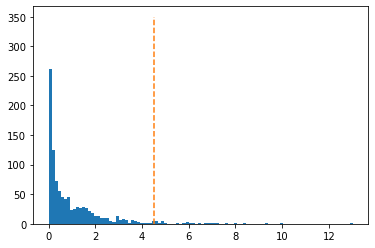

In [113]:
plt.hist(dd, bins=100);
plt.plot([4.5,4.5],[0,350], '--');

1000個のデータのうち、4.5より右にあるデータ数を数えて「逸脱度の差が4.5より大きくなる確率」を計算する。

In [114]:
np.sum(np.array(dd)>=4.5) / 1000

0.036

また、P=0.05となる逸脱度の差を調べると4.07となり、$\Delta D_{1,2}\leq 4.07$くらいまではよくある差と見なされる。

In [115]:
np.quantile(dd, q=0.95)

3.6480783582415452

この尤度比検定では、  
「逸脱度の差4.5のP値は0.042であり、これは有意水準0.05よりも小さい」ので有意差があり、  
「帰無仮説(一定モデル)は棄却され、xモデルが残るのでこれを採択」と判断する。

#### $\chi^2$分布を使った近似方法
逸脱度の差の確率分布は、自由度1の**$\chi^2$分布**で近似できる場合がある。  
ここで、この分布において4.5以上となる確率を求める。

In [132]:
chi = np.random.chisquare(1, 1000)
print(np.sum(chi>=4.5) / 1000)
print(np.quantile(chi, 0.95))

0.028
3.61848628092452


従って帰無仮説は棄却される。  
この方法で得られたP値とPB法で得られたP値は一致していない。  
$\chi^2$分布近似はサンプルサイズが大きい場合に有効な近似計算であるためである。

### 5.5 「帰無仮説を棄却できない」は「差がない」ではない
尤度比検定の結果$P\geq\alpha$となった場合には、「帰無仮説は棄却できない」と結論する。  
これは「帰無仮説が正しい」という意味ではなく、帰無仮説・対立仮説のどちらも正しいとも正しくないとも言えず、  
判断を保留するということである。